In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
# Load the dataset
df=pd.read_csv("WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


# Data Exploration and Cleaning

In [5]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [6]:
# Basic statistics of the dataset
print("\nDataset Statistics:\n", df.describe())



Dataset Statistics:
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000        

In [7]:
# Check for data types
print("\nData Types:\n", df.dtypes)



Data Types:
 fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object


In [8]:
# Drop duplicates if any
df = df.drop_duplicates()

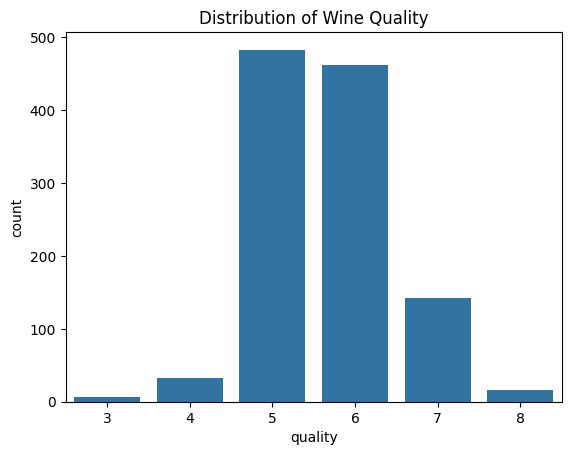

In [9]:

# Visualize the target distribution
sns.countplot(data=df, x='quality')
plt.title("Distribution of Wine Quality")
plt.show()

# Feature Selection

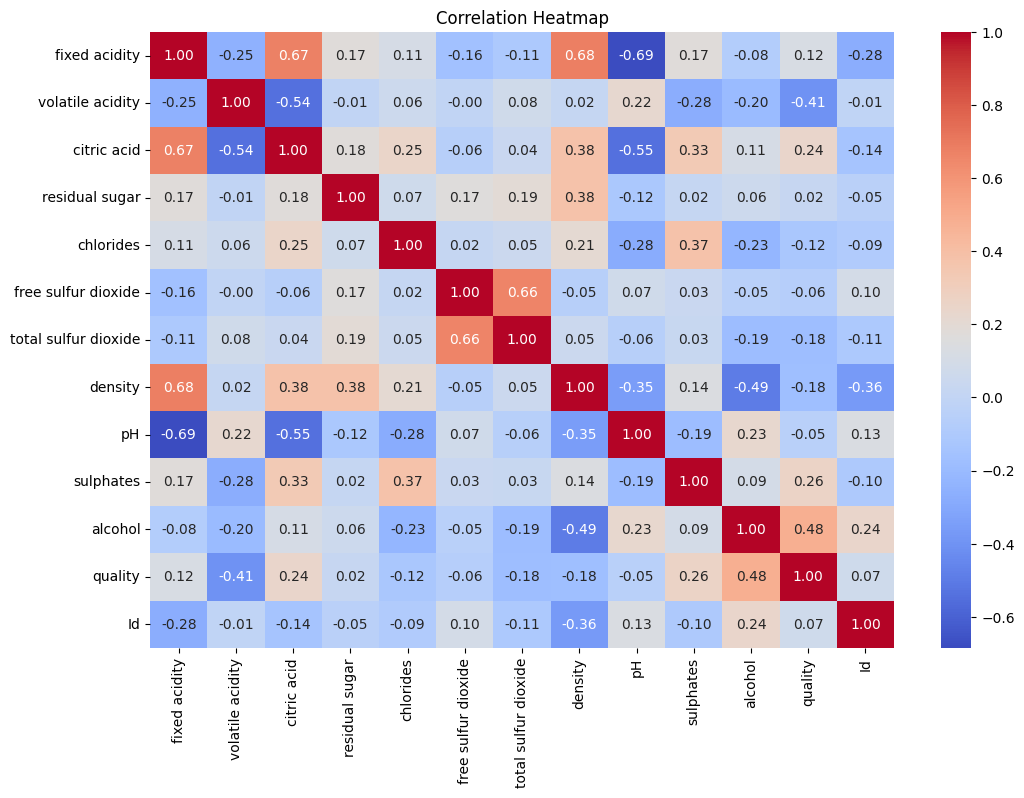

In [10]:
# Correlation heatmap to identify significant features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [11]:
# Define features and target
X = df.drop('quality', axis=1)  # Features
y = df['quality']              # Target

# Split the dataset

In [13]:
# Splitting into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

Training Data Shape: (914, 12)
Testing Data Shape: (229, 12)


# Train the Classifier Models

In [18]:
# Random Forest Classifier

In [14]:
# Initialize and train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [15]:
# Predictions
rf_predictions = rf_model.predict(X_test)

In [16]:
# Evaluation
print("Random Forest Classifier:\n", classification_report(y_test, rf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_predictions))

Random Forest Classifier:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.75      0.74        96
           6       0.63      0.70      0.66        99
           7       0.75      0.58      0.65        26
           8       0.00      0.00      0.00         2

    accuracy                           0.68       229
   macro avg       0.42      0.40      0.41       229
weighted avg       0.66      0.68      0.67       229

Accuracy: 0.6812227074235808


C:\Users\Shravanee Ramdasi\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Shravanee Ramdasi\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Shravanee Ramdasi\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [17]:
#  Stochastic Gradient Descent Classifier

In [19]:
# Initialize and train SGD Classifier
sgd_model = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_model.fit(X_train, y_train)

# Predictions
sgd_predictions = sgd_model.predict(X_test)

# Evaluation
print("SGD Classifier:\n", classification_report(y_test, sgd_predictions))
print("Accuracy:", accuracy_score(y_test, sgd_predictions))


SGD Classifier:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.74      0.33      0.46        96
           6       0.48      0.91      0.63        99
           7       0.00      0.00      0.00        26
           8       0.00      0.00      0.00         2

    accuracy                           0.53       229
   macro avg       0.25      0.25      0.22       229
weighted avg       0.52      0.53      0.47       229

Accuracy: 0.5327510917030568


C:\Users\Shravanee Ramdasi\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Shravanee Ramdasi\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Shravanee Ramdasi\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [24]:
# Initialize and train Support Vector Classifier
svc_model = SVC(kernel='linear', random_state=42)
svc_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [25]:
# Predictions
svc_predictions = svc_model.predict(X_test)

In [26]:
# Evaluation
print("Support Vector Classifier:\n", classification_report(y_test, svc_predictions))
print("Accuracy:", accuracy_score(y_test, svc_predictions))

Support Vector Classifier:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.69      0.76      0.72        96
           6       0.61      0.67      0.64        99
           7       0.47      0.27      0.34        26
           8       0.00      0.00      0.00         2

    accuracy                           0.64       229
   macro avg       0.35      0.34      0.34       229
weighted avg       0.61      0.64      0.62       229

Accuracy: 0.6375545851528385


C:\Users\Shravanee Ramdasi\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Shravanee Ramdasi\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Shravanee Ramdasi\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

# Visualize model performance

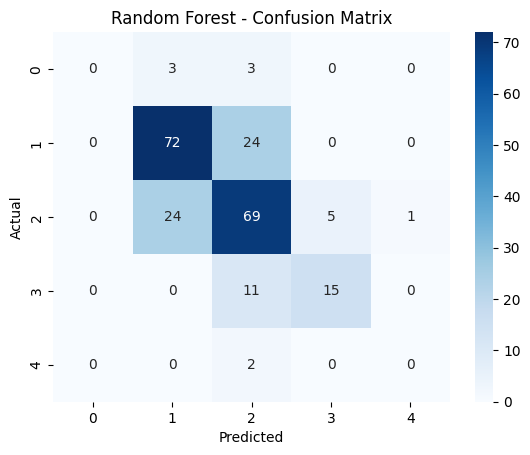

In [27]:
# Confusion Matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_predictions)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

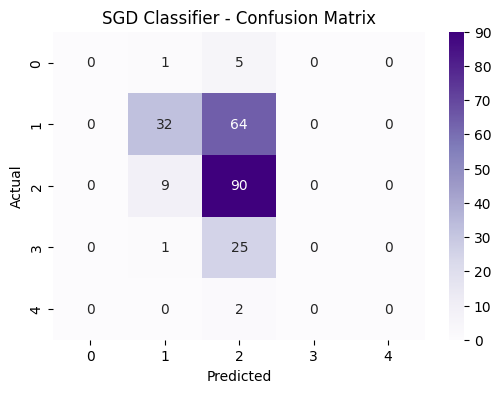

In [29]:
# Confusion Matrix for SGD Classifier
sgd_cm = confusion_matrix(y_test, sgd_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(sgd_cm, annot=True, fmt='d', cmap='Purples')
plt.title("SGD Classifier - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


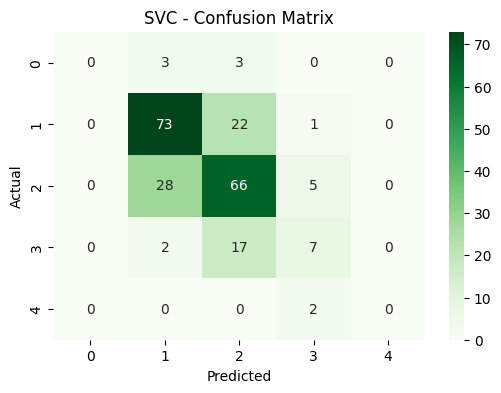

In [30]:
# Confusion Matrix for SVC
svc_cm = confusion_matrix(y_test, svc_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(svc_cm, annot=True, fmt='d', cmap='Greens')
plt.title("SVC - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


C:\Users\Shravanee Ramdasi\AppData\Local\Temp\ipykernel_448\2966487318.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='muted')


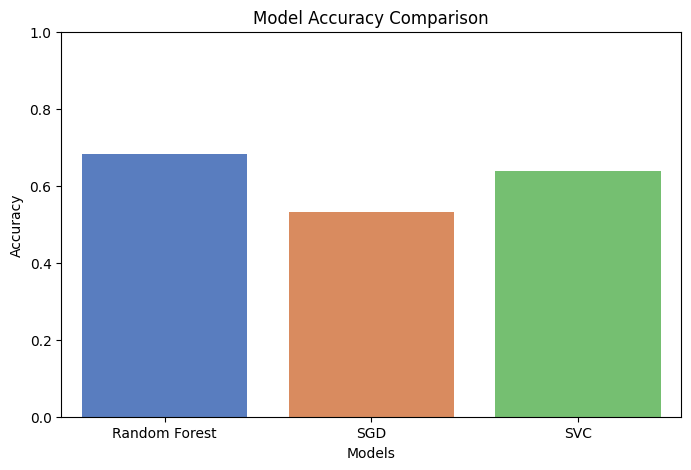

In [31]:
# Accuracy Comparison for All Models
models = ['Random Forest', 'SGD', 'SVC']
accuracies = [
    accuracy_score(y_test, rf_predictions),
    accuracy_score(y_test, sgd_predictions),
    accuracy_score(y_test, svc_predictions)
]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette='muted')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.ylim(0.0, 1.0)
plt.show()


C:\Users\Shravanee Ramdasi\AppData\Local\Temp\ipykernel_448\3021377245.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


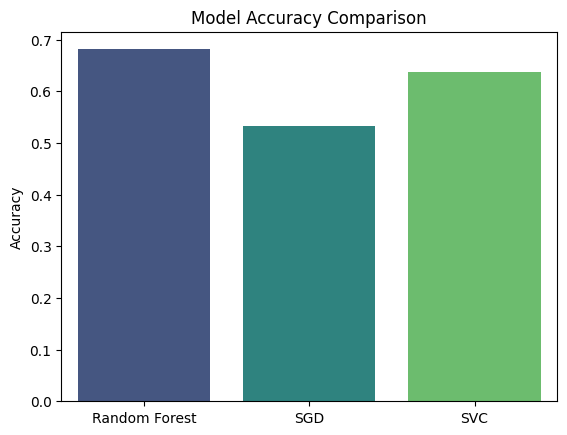

In [32]:
# Accuracy scores of all models
models = ['Random Forest', 'SGD', 'SVC']
accuracies = [
    accuracy_score(y_test, rf_predictions),
    accuracy_score(y_test, sgd_predictions),
    accuracy_score(y_test, svc_predictions)
]

# Bar plot for accuracy comparison
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


# Save the best model

In [33]:
import joblib

# Save the best-performing model (example: Random Forest)
joblib.dump(rf_model, "random_forest_model.pkl")
print("Random Forest model saved as random_forest_model.pkl")


Random Forest model saved as random_forest_model.pkl
